### The code below is to find vehicles in a video:

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
M:\M.Tech(2019-2021)\Sem1(2019)\NN_Ass-Project\Vehicle Detection\traffic_mini_detected_2.avi


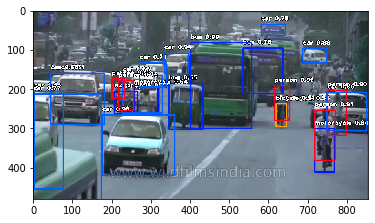

In [7]:
#This part of the code outputs the framenumber after each frame is checked for the particular objects (here 'Vehicles')

from imageai.Detection import VideoObjectDetection
import os
from matplotlib import pyplot as plt

execution_path = os.getcwd()

detector = VideoObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath( os.path.join(execution_path , "yolo.h5"))
detector.loadModel()

Flag = False

def forFrame(frame_number, output_array, output_count, returned_frame):
    Flag = False
    #print(returned_frame)
#   print(frame_number)
#   print(output_array)
    for eachItem in output_count:
        if Flag == False:
            if eachItem =='bus':
                #print(eachItem)
                print(frame_number)
                plt.imshow(returned_frame)
                Flag = True
                break
            else:
                continue
            
        else:
            break
        #print (eachframe)
        #plt.imshow(returned_frame)
        
        

    

video_path = detector.detectObjectsFromVideo(input_file_path=os.path.join( execution_path, "traffic-mini.mp4"),
                                             output_file_path=os.path.join(execution_path, "traffic_mini_detected"), 
                                             frames_per_second=1, per_frame_function=forFrame, return_detected_frame =True )
print(video_path)

In [20]:
for eachobject in video_path:
    print(eachobject)
    if eachobject[0] == 'bus':
        print(eachobject)
        #print(Frame)
    break    
#print(Frame)    

M


####  I have switched from Video to Image Processing, here the path given is the folder to which the frames were saved to earlier, wherein I assume the Camera attached to the Glasses will capture the image in front, every 5 secs.

### The code below is to classify vehicles from an image, using a pretrained model Yolov3

In [1]:
from imageai.Detection import ObjectDetection
import os

execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath( os.path.join(execution_path , "yolo.h5"))
detector.loadModel()
#path=any folder you have your 'Vehicle-detected-frames' saved
detections, objects_path = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , path), output_image_path=os.path.join(execution_path , "image3new.jpg"), minimum_percentage_probability=30,  extract_detected_objects=True)

#Each object localised is cropped an saved as different pics in th specified folder:-
for eachObject, eachObjectPath in zip(detections, objects_path):
    print(eachObject["name"] , " : " , eachObject["percentage_probability"], " : ", eachObject["box_points"] )
    print("Object's image saved in " + eachObjectPath)
    print("--------------------------------")

Using TensorFlow backend.
M:\M.Tech(2019-2021)\Anaconda 2019.07\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
M:\M.Tech(2019-2021)\Anaconda 2019.07\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
M:\M.Tech(2019-2021)\Anaconda 2019.07\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
M:\M.Tech(2019-2021)\Anaconda 2019.07\lib

bus  :  51.91546678543091  :  (936, 157, 1035, 580)
Object's image saved in M:\M.Tech(2019-2021)\Sem1(2019)\NN_Ass-Project\Vehicle Detection\image3new.jpg-objects\bus-1.jpg
--------------------------------
bus  :  69.98533010482788  :  (1015, 68, 1184, 675)
Object's image saved in M:\M.Tech(2019-2021)\Sem1(2019)\NN_Ass-Project\Vehicle Detection\image3new.jpg-objects\bus-2.jpg
--------------------------------
bus  :  99.05219078063965  :  (4, 3, 285, 852)
Object's image saved in M:\M.Tech(2019-2021)\Sem1(2019)\NN_Ass-Project\Vehicle Detection\image3new.jpg-objects\bus-3.jpg
--------------------------------
bus  :  99.86084699630737  :  (235, 42, 979, 785)
Object's image saved in M:\M.Tech(2019-2021)\Sem1(2019)\NN_Ass-Project\Vehicle Detection\image3new.jpg-objects\bus-4.jpg
--------------------------------
person  :  88.58593106269836  :  (233, 451, 283, 687)
Object's image saved in M:\M.Tech(2019-2021)\Sem1(2019)\NN_Ass-Project\Vehicle Detection\image3new.jpg-objects\person-5.jpg
-----

### The rest of the 9 cells below is the process to localise text parts of the 'Bus' Image acquired earlier

In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
mpl.rcParams['image.cmap'] = 'gray'


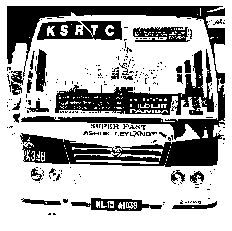

In [3]:
img = cv2.imread('M:/M.Tech(2019-2021)/Sem1(2019)/NN_Ass-Project/Vehicle Detection/image3new.jpg-objects/bus-4.jpg', 0)
# Thresholding the image
(thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
# Invert the image
img_bin = 255-img_bin 
cv2.imwrite("Image_bin.jpg",img_bin)
plt.axis('off')
plt.imshow(img_bin);

In [4]:
def f(x):
    # Defining a kernel length
    global horizontal_lines_img, vertical_lines_img, kernel
    kernel_length = np.array(img).shape[1]//x

    # A vertical kernel of (1 X kernel_length), which will detect all the vertical lines from the image.
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
    # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
    hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    # A kernel of (3 X 3) ones.
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    # Morphological operation to detect vertical lines from an image
    img_temp1 = cv2.erode(img_bin, vertical_kernel, iterations=3)
    vertical_lines_img = cv2.dilate(img_temp1, vertical_kernel, iterations=3)
    cv2.imwrite("vertical_lines.jpg",vertical_lines_img)
    # Morphological operation to detect horizontal lines from an image
    img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
    horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
    plt.subplot(1, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
    plt.imshow(vertical_lines_img);
    plt.axis('off')

    plt.subplot(1, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
    plt.imshow(horizontal_lines_img);
    plt.axis('off')

interact(f,  x=widgets.IntSlider(min=1,max=255,step=1,value=50));

interactive(children=(IntSlider(value=50, description='x', max=255, min=1), Output()), _dom_classes=('widget-i…

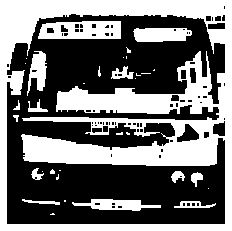

In [5]:
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(vertical_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.axis('off')
plt.imshow(img_final_bin)


In [6]:
img_final_bin #to check the format

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [7]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))

    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)
cv2.RETR_TREE
#cv2.CHAIN_APPROX_SIMPLE

3

In [8]:
# Find contours for image, which will detect all the text containing boxes
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [9]:

# Sort all the contours by top to bottom.
(contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")

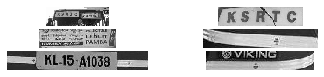

In [10]:

idx = 0
for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
# If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
    if (w > 80 and h > 20) and w > 3*h:
        idx += 1
        new_img = img[y:y+h, x:x+w]
        cv2.imwrite('M:/M.Tech(2019-2021)/Sem1(2019)/NN_Ass-Project/Vehicle Detection/image3new.jpg-objects/Cropped_Images/Cropped{}.png'.format(idx), new_img)
        plt.subplot(10,2, idx)
        plt.imshow(new_img )
        plt.axis('off')


### Now we extract the text from Images acquired by the above process using pytesseract and convert the thus obtained text into speech using pyttsx3, and Googletranslator is used to translate the text if its in some other language

In [11]:
import os
import tempfile
import subprocess


In [12]:
import pytesseract       
  
# adds image processing capabilities 
from PIL import Image     
  
 # converts the text to speech   
import pyttsx3            
  
#translates into the mentioned language 
from googletrans import Translator       
  
 # opening an image from the source path 
img=Image.open('M:/M.Tech(2019-2021)/Sem1(2019)/NN_Ass-Project/Vehicle Detection/image3new.jpg-objects/Cropped_Images/Cropped3.png')      
  
# describes image format in the output 
print(img)                           
# path where the tesseract module is installed 
pytesseract.pytesseract.tesseract_cmd ='M:/M.Tech(2019-2021)/tesseract.exe'   
# converts the image to result and saves it into result variable 
result = pytesseract.image_to_string(img) 
print(result)


<PIL.PngImagePlugin.PngImageFile image mode=L size=199x48 at 0x276EE505860>
a atte ae
‘en “oon moe CILLA
rae PAMBA


In [20]:
# write text in a text file and save it to source path    
with open('abc.txt',mode ='w') as file:      
      
                 file.write(result) 
                 print(result) 
                   
p = Translator()                       
#I already had the English transliterated Malayalam words on the destination board of the Bus so haven't used the translator effectively: 
k = p.translate(result,dest='english')       
print(k) 
engine = pyttsx3.init() 
  
# an audio will be played which speaks the text (if pyttsx3 recognizes it) 
engine.say(k.text)                              
engine.runAndWait() 

a atte ae
‘en “oon moe CILLA
rae PAMBA
Translated(src=es, dest=en, text=Atte ae
'In' oon moe CILLA
rae PAMBA, pronunciation=None, extra_data="{'translat...")


#### The conversion of image to text is not that perfect and so the error in pronunciation.

### Please note that this program reads only English alphabets so destination written on the 'Bus' should be in English language